In [1]:
import numpy as np

In [2]:
#1
A=np.array([[1,2,4],
            [3,8,14],
            [2,6,13]],dtype=float)
B=np.array([[3,13,4]])

In [3]:
ab=np.concatenate([A,B.T],axis=1)
lam1=ab[1,0]/ab[0,0]
ab[1]=ab[1]-lam1*ab[0]

lam2=ab[2,0]/ab[0,0]
ab[2]-=lam2*ab[0]

lam3=ab[2,1]/ab[1,1]
ab[2]-=lam3*ab[1]
print(ab)
a=ab[:,:3]
b=ab[:,-1]

[[ 1.  2.  4.  3.]
 [ 0.  2.  2.  4.]
 [ 0.  0.  3. -6.]]


In [4]:
x=np.zeros(3,)
x[2]=b[2]/a[2,2]

x[1]=(b[1]-np.dot(a[1,2],x[2]))/a[1,1]
x[0]=(b[0]-np.dot(a[0,1:],x[1:]))/a[0,0]
print(x)

[ 3.  4. -2.]


In [5]:
np.linalg.solve(A,B.T)
#일치한다

array([[ 3.],
       [ 4.],
       [-2.]])

In [6]:
#2
A=np.array([[0,0,2,1,2],
            [0,1,0,2,-1],
            [1,2,0,-2,0],
            [0,0,0,-1,1],
            [0,1,-1,1,-1]],dtype=float)
B=np.array([[1,1,-4,-2,1]])

In [7]:
ab=np.concatenate([A,B.T],axis=1)
ab[0],ab[2]=ab[2].copy(),ab[0].copy()
ab[4]-=ab[1]
ab[4]-=(ab[4,2]/ab[2,2])*ab[2]
ab[4]-=(ab[4,3]/ab[3,3])*ab[3]
ab

array([[ 1. ,  2. ,  0. , -2. ,  0. , -4. ],
       [ 0. ,  1. ,  0. ,  2. , -1. ,  1. ],
       [ 0. ,  0. ,  2. ,  1. ,  2. ,  1. ],
       [ 0. ,  0. ,  0. , -1. ,  1. , -2. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  1.5]])

In [8]:
a=ab[:,:5]
b=ab[:,-1]
x=np.zeros(5,)
x[4]=b[4]/a[4,4]

x[3]=(b[3]-np.dot(a[3,4],x[4]))/a[3,3]
x[2]=(b[2]-np.dot(a[2,3:],x[3:]))/a[2,2]
x[1]=(b[1]-np.dot(a[1,2:],x[2:]))/a[1,1]
x[0]=(b[0]-np.dot(a[0,1:],x[1:]))/a[0,0]
print(x)

[18. -6. -5.  5.  3.]


In [9]:
np.linalg.solve(A,B.T)

array([[18.],
       [-6.],
       [-5.],
       [ 5.],
       [ 3.]])

In [10]:
#3
def gauss(a,b):
# Elimination phase
  n=len(b)
  x=np.zeros(n,)
  for k in range(n-1,0,-1): # pivot rows k = 0, 1, ...
    for i in range(k-1,-1,-1): # range i = 1
      if a[i,k] != 0.0 :
# print('We are in the loop',i,k)
        lam = a[i,k]/a[k,k] # Definion of lambda
        a[i] = a[i] - lam*a[k] # a[i,k+1:n] 까지 변경
        b[i] = b[i] - lam*b[k]
        print(a,b)
  
# Back substitution
  for k in range(0,n): # From end to beginning
    x[k] = ( b[k] - np.dot(a[k,:k],x[:k]) )/a[k,k] # j = k+1, ..., n
  return x

In [11]:
A=np.array([[1,2,3],
            [3,10,3],
            [2,4,1]],dtype=float)
B=np.array([3,13,4])
gauss(A,B)

[[ 1.  2.  3.]
 [-3. -2.  0.]
 [ 2.  4.  1.]] [3 1 4]
[[ -5. -10.   0.]
 [ -3.  -2.   0.]
 [  2.   4.   1.]] [-9  1  4]
[[10.  0.  0.]
 [-3. -2.  0.]
 [ 2.  4.  1.]] [-14   1   4]


array([-1.4,  1.6,  0.4])

In [12]:
np.linalg.solve(A,B)

array([-1.4,  1.6,  0.4])

In [13]:
#4
def LU(a,b):
    n=len(b)
    A=a.copy()
    L=np.eye(n)
    for j in range(0,n-1):
      for i in range(j+1,n):
        if A[i,j] !=0: # Filter nonzero elements
          L[i,j]=A[i,j]/A[j,j]
          A[i]=A[i]-L[i,j]*A[j] # Subtract
    
    U=A.copy()
    y= np.zeros(n)
    x= np.zeros(n)
    # Solves L@y = b by forward substitution
    y[0] = b[0]
    for k in range(1,n):
      y[k]=b[k]-np.dot(L[k,0:k],y[0:k])

    # Then we need to solve U@x = y through backward substitution
    for k in range(n-1,-1,-1):
      x[k]=(y[k]-np.dot(U[k,k+1:n],x[k+1:n]))/U[k,k]

    return x

In [14]:
# 3번예시로 LU확인
LU(A,B)

array([-1.4,  1.6,  0.4])

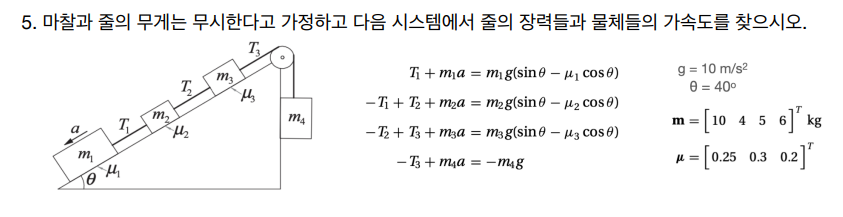

In [15]:
#좌변
m=np.array([10,4,5,6])
mu=np.array([0.25,0.3,0.2])
A=np.array([[1,0,0],
            [-1,1,0],
            [0,-1,1],
            [0,0,-1]])
x=np.zeros(4,)

In [16]:
#우변
g=10
theta=np.radians(40)
b0=m[0]*g*(np.sin(theta)-mu[0]*np.cos(theta))
b1=m[1]*g*(np.sin(theta)-mu[1]*np.cos(theta))
b2=m[2]*g*(np.sin(theta)-mu[2]*np.cos(theta))
b3=-m[3]*g
b=np.array([b0,b1,b2,b3])

In [17]:
m=m.reshape(4,1)
Amat=np.concatenate([A,m],axis=1)

In [18]:
ans=np.linalg.solve(Amat,b).tolist()

In [19]:
print(f'T:{ans[:3]} a:{ans[-1]}')

T:[34.67742708513928, 47.01630903295703, 66.27013368332412] a:1.04502228055402
